In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


In [3]:
# Binary
y_test_binary = np.load("dataset/y_test_binary.npy")

# Multiclass
y_test_multi = np.load("dataset/y_test_multi.npy")

print("Binary unique:", np.unique(y_test_binary))
print("Multiclass unique:", np.unique(y_test_multi))


Binary unique: [0 1]
Multiclass unique: [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [5]:
# Binary Predictions
y_pred_rf_binary = np.load("dataset/y_pred_rf_binary.npy")
y_pred_ann_binary = np.load("dataset/y_pred_ann_binary.npy")

# Multiclass Predictions
y_pred_rf_multi = np.load("dataset/y_pred_rf_multi.npy")
y_pred_ann_multi_regular = np.load("dataset/y_pred_ann_multi_regular.npy")
y_pred_ann_multi_classweight = np.load("dataset/y_pred_ann_multi_classweight.npy")
y_pred_ann_multi_focal = np.load("dataset/y_pred_ann_multi_focal.npy")
y_pred_ann_multi_smote = np.load("dataset/y_pred_ann_multi_smote.npy")

In [7]:
binary_results = []

binary_models = {
    "Random Forest": y_pred_rf_binary,
    "ANN": y_pred_ann_binary
}

for name, preds in binary_models.items():
    acc = accuracy_score(y_test_binary, preds)
    macro_f1 = f1_score(y_test_binary, preds, average="macro")
    
    binary_results.append([name, acc, macro_f1])

binary_df = pd.DataFrame(binary_results, columns=["Model", "Accuracy", "Macro F1"])

binary_df


,Model,Accuracy,Macro F1
0,Random Forest,0.998916,0.998288
1,ANN,0.988282,0.981589


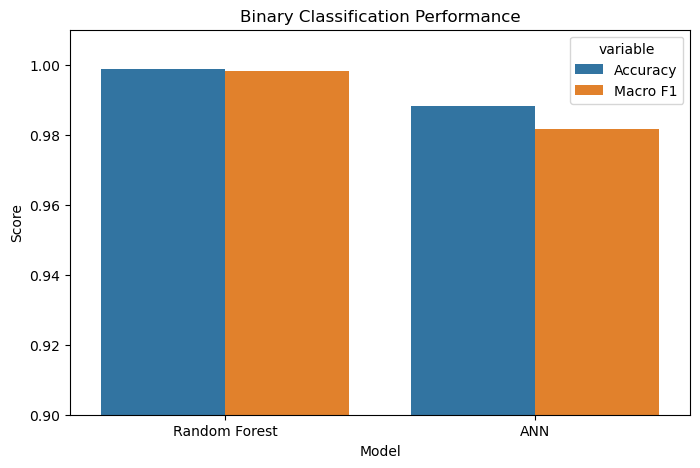

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(data=binary_df.melt(id_vars="Model"),
            x="Model", y="value", hue="variable")

plt.title("Binary Classification Performance")
plt.ylim(0.9, 1.01)
plt.ylabel("Score")
plt.show()


In [11]:
multi_results = []

multi_models = {
    "Random Forest": y_pred_rf_multi,
    "ANN Regular": y_pred_ann_multi_regular,
    "ANN ClassWeight": y_pred_ann_multi_classweight,
    "ANN Focal": y_pred_ann_multi_focal,
    "ANN SMOTE": y_pred_ann_multi_smote
}

for name, preds in multi_models.items():
    acc = accuracy_score(y_test_multi, preds)
    macro_f1 = f1_score(y_test_multi, preds, average="macro")
    
    multi_results.append([name, acc, macro_f1])

multi_df = pd.DataFrame(multi_results, columns=["Model", "Accuracy", "Macro F1"])

multi_df.sort_values(by="Macro F1", ascending=False)


,Model,Accuracy,Macro F1
0,Random Forest,0.998538,0.912487
1,ANN Regular,0.985008,0.776307
3,ANN Focal,0.982228,0.774017
4,ANN SMOTE,0.990378,0.737950
2,ANN ClassWeight,0.899007,0.582288


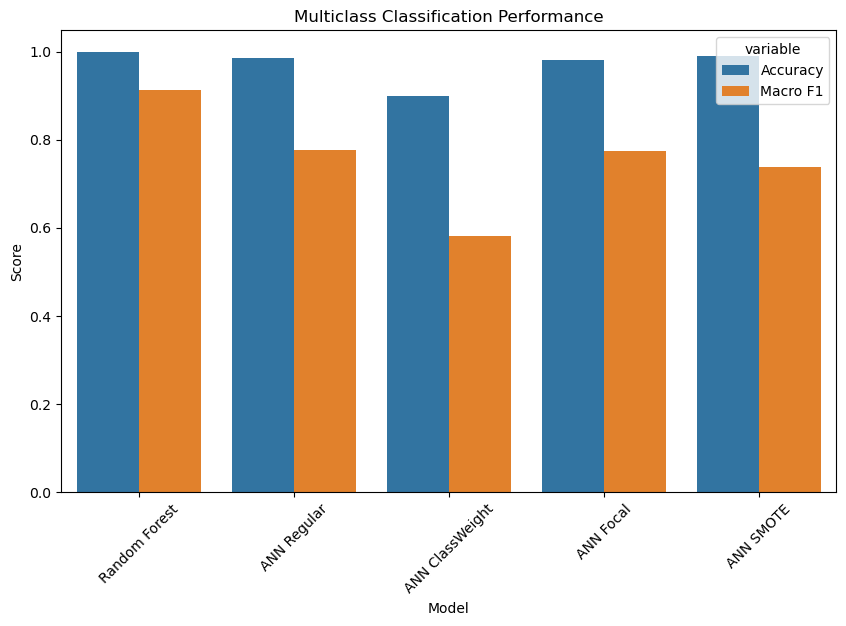

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(data=multi_df.melt(id_vars="Model"),
            x="Model", y="value", hue="variable")

plt.title("Multiclass Classification Performance")
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.show()


In [15]:
print("=== FINAL MULTICLASS RANKING (Macro F1) ===\n")
print(multi_df.sort_values(by="Macro F1", ascending=False))


=== FINAL MULTICLASS RANKING (Macro F1) ===

             Model  Accuracy  Macro F1
0    Random Forest  0.998538  0.912487
1      ANN Regular  0.985008  0.776307
3        ANN Focal  0.982228  0.774017
4        ANN SMOTE  0.990378  0.737950
2  ANN ClassWeight  0.899007  0.582288
